task: dataset with set of attributes : **customer purchase behaviour analysis **

business problems: an ecommerce company should:

understand customer purchasing behaviour clean raw user data generate insights for business decisions

dataset: option 1: download option 2: create one

features that are expected:

customer_id age gender city signup_data purchased _amount purchased

task:

data understanding and inspection'
data cleaning
feature engineering > extract signupmonth and signup week
Aggregations and group by > average purchase by city > purchase count by gender > montly revenue trend > percentage of customer purchasing>1000
data filtering and business insights > customers that signed up but never purchased > cities with highest revenue > age group with highest average purchased
final clean dataset > no missing values > numeric encoded variable > clean feature


Mthplot Lib functions

data set download

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv("/content/Shopping Trends And Customer Behaviour Dataset.csv")

data understanding and inspection'

In [ ]:
df.head()

,Unnamed: 0,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,0,1,55,Male,Blouse,Clothing,53,Kentucky,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,1,2,19,Male,Sweater,Clothing,64,Maine,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,2,3,50,Male,Jeans,Clothing,73,Massachusetts,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,3,4,21,Male,Sandals,Footwear,90,Rhode Island,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,4,5,45,Male,Blouse,Clothing,49,Oregon,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              3900 non-null   int64  
 1   Customer ID             3900 non-null   int64  
 2   Age                     3900 non-null   int64  
 3   Gender                  3900 non-null   object 
 4   Item Purchased          3900 non-null   object 
 5   Category                3900 non-null   object 
 6   Purchase Amount (USD)   3900 non-null   int64  
 7   Location                3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [ ]:
df.describe(include='all')

,Unnamed: 0,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
count,3900.000000,3900.000000,3900.000000,3900,3900,3900,3900.000000,3900,3900,3900,3900.000000,3900,3900,3900,3900,3900.000000,3900,3900
unique,NaN,NaN,NaN,2,25,4,NaN,50,25,4,NaN,2,6,2,2,NaN,6,7
top,NaN,NaN,NaN,Male,Blouse,Clothing,NaN,Montana,Olive,Spring,NaN,No,Free Shipping,No,No,NaN,PayPal,Every 3 Months
freq,NaN,NaN,NaN,2652,171,1737,NaN,96,177,999,NaN,2847,675,2223,2223,NaN,677,584
mean,1949.500000,1950.500000,44.068462,NaN,NaN,NaN,59.764359,NaN,NaN,NaN,3.749949,NaN,NaN,NaN,NaN,25.351538,NaN,NaN
std,1125.977353,1125.977353,15.207589,NaN,NaN,NaN,23.685392,NaN,NaN,NaN,0.716223,NaN,NaN,NaN,NaN,14.447125,NaN,NaN
min,0.000000,1.000000,18.000000,NaN,NaN,NaN,20.000000,NaN,NaN,NaN,2.500000,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,974.750000,975.750000,31.000000,NaN,NaN,NaN,39.000000,NaN,NaN,NaN,3.100000,NaN,NaN,NaN,NaN,13.000000,NaN,NaN
50%,1949.500000,1950.500000,44.000000,NaN,NaN,NaN,60.000000,NaN,NaN,NaN,3.700000,NaN,NaN,NaN,NaN,25.000000,NaN,NaN
75%,2924.250000,2925.250000,57.000000,NaN,NaN,NaN,81.000000,NaN,NaN,NaN,4.400000,NaN,NaN,NaN,NaN,38.000000,NaN,NaN


addind to more column names i.e., purchased and signup date

In [ ]:
df['purchased'] = np.where(df['Purchase Amount (USD)'] == 0, 'No', 'Yes')
date_range = pd.date_range(start='2024-01-01', end='2024-12-31')

df['signup_date'] = np.random.choice(date_range, size=len(df))
df.head()

,Unnamed: 0,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,purchased,signup_date
0,0,1,55,Male,Blouse,Clothing,53,Kentucky,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly,Yes,2024-09-23
1,1,2,19,Male,Sweater,Clothing,64,Maine,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly,Yes,2024-01-10
2,2,3,50,Male,Jeans,Clothing,73,Massachusetts,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Yes,2024-10-11
3,3,4,21,Male,Sandals,Footwear,90,Rhode Island,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly,Yes,2024-01-29
4,4,5,45,Male,Blouse,Clothing,49,Oregon,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually,Yes,2024-06-02


feature engineering > extract signupmonth and signup week

In [ ]:
df['signup_date'] = pd.to_datetime(df['signup_date'])

df['signup_month'] = df['signup_date'].dt.month
df['signup_week'] = df['signup_date'].dt.isocalendar().week
df

,Unnamed: 0,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Color,Season,...,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,purchased,signup_date,signup_month,signup_week
0,0,1,55,Male,Blouse,Clothing,53,Kentucky,Gray,Winter,...,Express,Yes,Yes,14,Venmo,Fortnightly,Yes,2024-09-23,9,39
1,1,2,19,Male,Sweater,Clothing,64,Maine,Maroon,Winter,...,Express,Yes,Yes,2,Cash,Fortnightly,Yes,2024-01-10,1,2
2,2,3,50,Male,Jeans,Clothing,73,Massachusetts,Maroon,Spring,...,Free Shipping,Yes,Yes,23,Credit Card,Weekly,Yes,2024-10-11,10,41
3,3,4,21,Male,Sandals,Footwear,90,Rhode Island,Maroon,Spring,...,Next Day Air,Yes,Yes,49,PayPal,Weekly,Yes,2024-01-29,1,5
4,4,5,45,Male,Blouse,Clothing,49,Oregon,Turquoise,Spring,...,Free Shipping,Yes,Yes,31,PayPal,Annually,Yes,2024-06-02,6,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3895,3896,40,Female,Hoodie,Clothing,28,Virginia,Turquoise,Summer,...,2-Day Shipping,No,No,32,Venmo,Weekly,Yes,2024-10-13,10,41
3896,3896,3897,52,Female,Backpack,Accessories,49,Iowa,White,Spring,...,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly,Yes,2024-07-13,7,28
3897,3897,3898,46,Female,Belt,Accessories,33,New Jersey,Green,Spring,...,Standard,No,No,24,Venmo,Quarterly,Yes,2024-01-22,1,4
3898,3898,3899,44,Female,Shoes,Footwear,77,Minnesota,Brown,Summer,...,Express,No,No,24,Venmo,Weekly,Yes,2024-04-01,4,14


Average purchase by city

In [ ]:
df.groupby("Location").agg(avg_amount=("Purchase Amount (USD)","mean"))

,avg_amount
Location,
Alabama,59.112360
Alaska,67.597222
Arizona,66.553846
Arkansas,61.113924
California,59.000000
Colorado,56.293333
Connecticut,54.179487
Delaware,55.325581
Florida,55.852941


Purchase count by gender

In [ ]:
df.groupby("Gender").agg(avg_amount=("Purchase Amount (USD)","mean"))

,avg_amount
Gender,
Female,60.249199
Male,59.536199


monthly revenue trends

In [ ]:
df.groupby("signup_month").agg(avg_amount=("Purchase Amount (USD)","sum"))

,avg_amount
signup_month,
1,20906
2,17786
3,20124
4,19232
5,19788
6,16531
7,21169
8,19907
9,18549


> percentage of customer purchasing<=20

In [ ]:
percentage=(df['Purchase Amount (USD)'] <= 20).mean() * 100
percentage

np.float64(1.3333333333333335)

data filtering and business insights > customers that signed up but never purchased

In [ ]:
df[df["Purchase Amount (USD)"]==0]

,Unnamed: 0,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Color,Season,...,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases,purchased,signup_date,signup_month,signup_week


> cities with highest revenue

In [ ]:
max_location=df.groupby("Location").agg(avg_amount=("Purchase Amount (USD)","max"))
max_location.loc[max_location['avg_amount'].idxmax()]

,Alabama
avg_amount,100


> age group with highest average purchased

In [ ]:
mean_age=df.groupby("Age").agg(avg_amount=("Purchase Amount (USD)","mean"))
mean_age.loc[mean_age['avg_amount'].idxmax()]

,53
avg_amount,67.885714


final clean dataset :


> no missing values > numeric encoded variable > clean feature

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Unnamed: 0              3900 non-null   int64         
 1   Customer ID             3900 non-null   int64         
 2   Age                     3900 non-null   int64         
 3   Gender                  3900 non-null   object        
 4   Item Purchased          3900 non-null   object        
 5   Category                3900 non-null   object        
 6   Purchase Amount (USD)   3900 non-null   int64         
 7   Location                3900 non-null   object        
 8   Color                   3900 non-null   object        
 9   Season                  3900 non-null   object        
 10  Review Rating           3900 non-null   float64       
 11  Subscription Status     3900 non-null   object        
 12  Shipping Type           3900 non-null   object  

In [ ]:
df


Age Group vs Purchase Amount

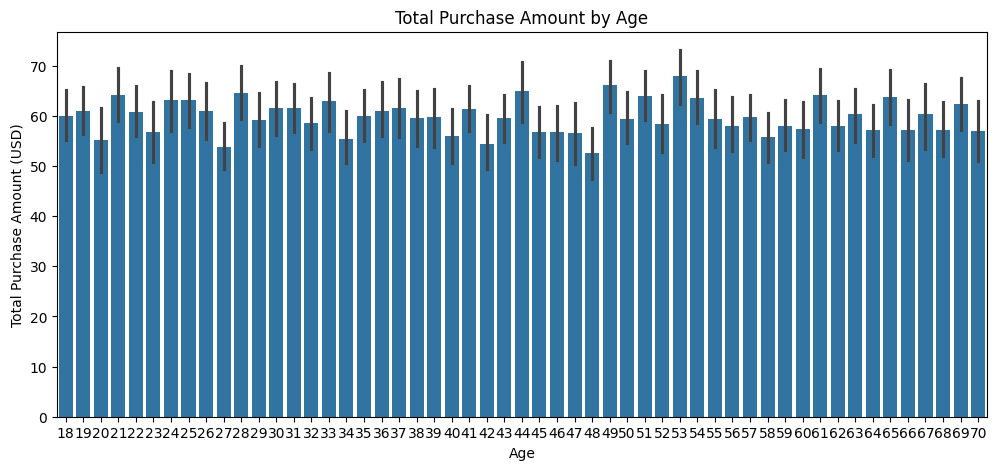

In [ ]:
plt.figure(figsize=(12,5))
sns.barplot(x='Age', y='Purchase Amount (USD)', data=df)
plt.title('Total Purchase Amount by Age')
plt.xlabel('Age')
plt.ylabel('Total Purchase Amount (USD)')
plt.show()

Monthly revenue trends

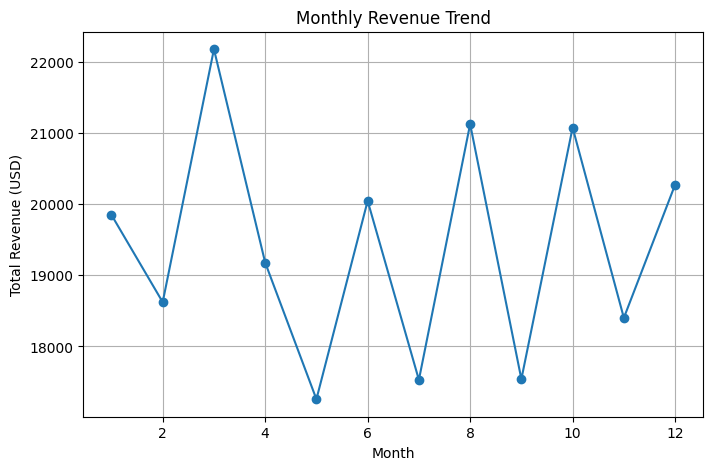

In [ ]:
df['signup_month'] = pd.to_datetime(df['signup_date']).dt.month

monthly_revenue = df.groupby('signup_month')['Purchase Amount (USD)'].sum()

plt.figure(figsize=(8,5))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o')
plt.title('Monthly Revenue Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue (USD)')
plt.grid(True)
plt.show()

category wise revenue

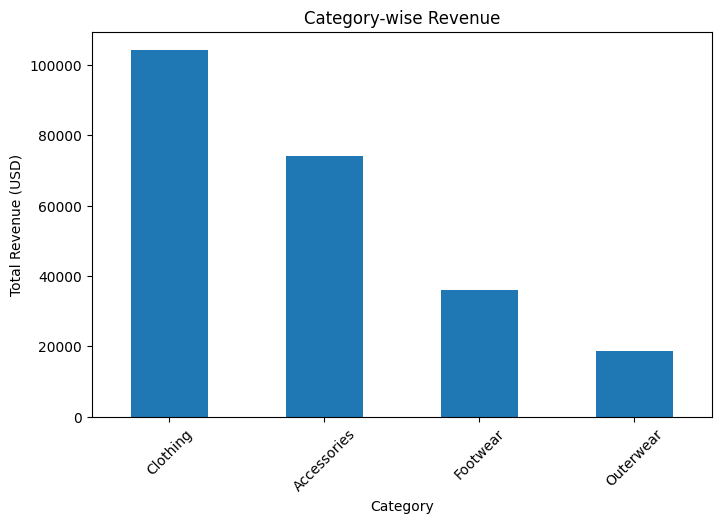

In [ ]:
category_revenue = df.groupby('Category')['Purchase Amount (USD)'].sum().sort_values(ascending=False)

plt.figure(figsize=(8,5))
category_revenue.plot(kind='bar')
plt.title('Category-wise Revenue')
plt.xlabel('Category')
plt.ylabel('Total Revenue (USD)')
plt.xticks(rotation=45)
plt.show()

Gender wise purchase count

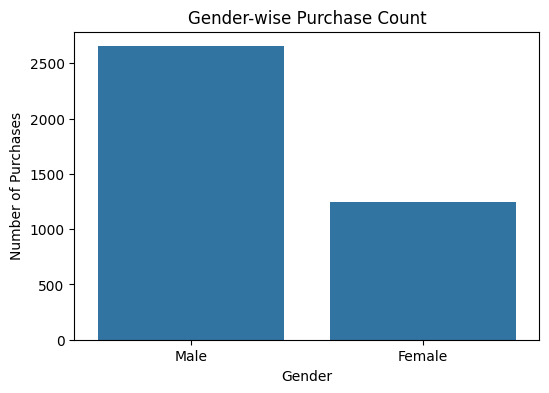

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df)
plt.title('Gender-wise Purchase Count')
plt.xlabel('Gender')
plt.ylabel('Number of Purchases')
plt.show()